In [1]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [8]:
t=[0,0,1,0,0,0,0,0,0,0]

In [9]:
import numpy as np
def sum_squares_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [10]:
sum_squares_error(np.array(y),np.array(t))

0.09750000000000003

In [11]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [12]:
sum_squares_error(np.array(y),np.array(t))

0.5975

In [13]:
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

In [14]:
t=[0,0,1,0,0,0,0,0,0,0]

In [15]:
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]

In [16]:
cross_entropy_error(np.array(y),np.array(t))

0.510825457099338

In [17]:
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [18]:
cross_entropy_error(np.array(y),np.array(t))

2.302584092994546

In [1]:
import sys,os
sys.path.append(os.pardir)
import numpy as np
from ch04.mnist import load_mnist

(x_train,t_train), (x_text,t_test) = \
    load_mnist(normalize=True, one_hot_label=True )

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


In [2]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [3]:
np.random.choice(6000,10)

array([ 459, 1976, 1597, 1374, 3938, 4942, 1416,  885, 3164, 5307])

In [4]:
def cross_entropy_error(y,t):
    if y.ndim ==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t*np.log(y+1e-7))/batch_size
    

In [5]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
        
        batch_size = y.shape[0]
        return -np.sum(np.log(y[np.arange(batcj_size),t]+1e-7))/batch_size
        

In [6]:
#나쁜구현의 예
def numercial_diff(x,y):
    h = 10e-50
    return (f(x+h)-f(x))/h

In [7]:
#파이썬 반올림 오차 예시
#파이선에서 반올림오차는 작은값이 생략되어 최종 계산 결과에 오차가 생기게 된다
np.float32(1e-50)

0.0

In [29]:
#수치미분구현 (올바른 형식)
def numercial_diff(f,x):
    h = 1e-4 
    return (f(x+h)-f(x-h))/(2*h)

In [30]:
def function_1(x):
    return 0.01*x**2+0.1*x

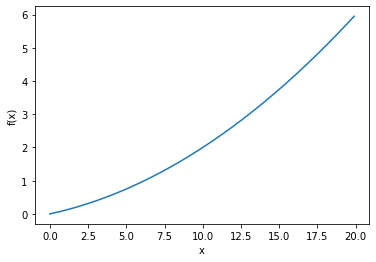

In [31]:
import numpy as np
import matplotlib.pylab as plt

x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [32]:
numercial_diff(function_1,5)

0.1999999999990898

In [33]:
numercial_diff(function_1,10)

0.2999999999986347

In [38]:
def function_2(x):
    return x[0]**2 +x[1]**2

In [40]:
def function_tmp1(x0):
    return x0*x0+4.0**2.0

In [41]:
numercial_diff(function_tmp1,3.0)

6.00000000000378

In [45]:
def function_tmp2(x1):
    return 3.0**2+x1*x1

numercial_diff(function_tmp2,4.0)


7.999999999999119

In [46]:
def numercial_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx]=tmp_val +h
        fxh1=f(x)
        
        x[idx]=tmp_val - h
        fxh2=f(x)
        
        grad[idx] = (fxh1-fxh2)/2*h
        x[idx] = tmp_val
        
    return grad

In [47]:
numercial_gradient(function_2,np.array([3.0,4.0]))

array([6.e-08, 8.e-08])

In [48]:
numercial_gradient(function_2,np.array([0.0,2.0]))

array([0.e+00, 4.e-08])

In [49]:
numercial_gradient(function_2,np.array([3.0,0.0]))

array([6.e-08, 0.e+00])

In [50]:
def gradient_descent(f, init_x, lr=0.01,step_num=100):
    x = init_x
    
    for i in range(step_num):
        grad = numercial_gradient(f,x)
        x -= lr * grad
    return x

In [58]:
def function_2(x):
    return x[0]**2+x[1]**2

In [55]:
init_x = np.array([-3.0,4.0])

In [59]:
gradient_descent(function_2, init_x=init_x, lr =0.1, step_num=100)

array([-2.9999988,  3.9999984])

In [60]:
init_x = np.array([-3.0,4.0])

In [61]:
gradient_descent(function_2, init_x=init_x, lr =10.0, step_num=100)

array([-2.99994,  3.99992])

In [62]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr =1e-10, step_num=100)

array([-3.,  4.])

In [72]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from ch04.functions import softmax,cross_entropy_error
from ch04.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss




In [73]:
net =simpleNet()
print(net.W)

[[-0.84783724 -0.51770053  0.41521287]
 [-0.24511697  1.26817914  0.91845902]]


In [74]:
x=np.array([0.6,0.9])

In [75]:
p= net.predict(x)

In [76]:
print(p)

[-0.72930762  0.83074091  1.07574084]


In [77]:
np.argmax(p)

2

In [78]:
t=np.array([0,0,1])

In [79]:
net.loss(x,t)

0.6663773957595472

In [85]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from ch04.functions import softmax, cross_entropy_error
from ch04.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)



[[ 0.22903455  0.09741015 -0.3264447 ]
 [ 0.34355183  0.14611522 -0.48966705]]


In [95]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from ch04.functions import *
from ch04.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [96]:
net = TwoLayerNet(input_size = 784, hidden_size=100,output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [97]:
x=np.random.rand(100,784) #더미데이터 100장분량
y = net.predict(x)

In [101]:
x = np.random.rand(100,784) #더미입력데이터 100장분량
t = np.random.rand(100,10) #정답데이터 100장분량

grads = net.numerical_gradient(x,t) #기울기계산


grads['W1'].shape #(784,100)
grads['b1'].shape #(100,)
grads['W2'].shape #(100,10)
grads['b1'].shape #(10,)

(100,)

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7925666666666666, 0.7967
train acc, test acc | 0.8795, 0.885
train acc, test acc | 0.9001666666666667, 0.9021
train acc, test acc | 0.9105333333333333, 0.9108
train acc, test acc | 0.9158333333333334, 0.9184
train acc, test acc | 0.9205, 0.9223
train acc, test acc | 0.9250166666666667, 0.9256
train acc, test acc | 0.9281333333333334, 0.929
train acc, test acc | 0.93075, 0.9326
train acc, test acc | 0.9349666666666666, 0.9349
train acc, test acc | 0.9369, 0.9375
train acc, test acc | 0.9383333333333334, 0.9389
train acc, test acc | 0.9407833333333333, 0.9396
train acc, test acc | 0.9424, 0.9427
train acc, test acc | 0.9454333333333333, 0.9433
train acc, test acc | 0.9464666666666667, 0.9449


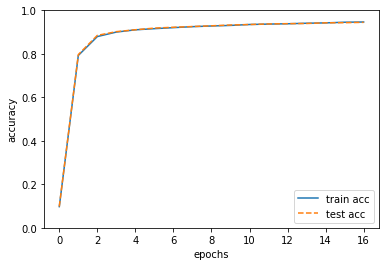

In [109]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from ch03.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

      # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()



    
  